<a href="https://colab.research.google.com/github/saimaniippili/2200031044_JFSD_SEMEND_EXAM/blob/main/toxic_comment_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Task
using nlp we need to do data analysis with the dataset

Here is all the data you need:
"sample_submission.csv"
"test.csv"
"test_labels.csv"
"train.csv"

## Data loading

### Subtask:
Load the provided CSV files into pandas DataFrames.


**Reasoning**:
Load the four CSV files into pandas DataFrames and display their first few rows.



In [13]:
import pandas as pd

df_sample_submission = pd.read_csv('sample_submission.csv')
df_test = pd.read_csv('test.csv')
df_test_labels = pd.read_csv('test_labels.csv')
df_train = pd.read_csv('train.csv')

display(df_sample_submission.head())
display(df_test.head())
display(df_test_labels.head())
display(df_train.head())

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.5,0.5,0.5,0.5,0.5,0.5
1,0000247867823ef7,0.5,0.5,0.5,0.5,0.5,0.5
2,00013b17ad220c46,0.5,0.5,0.5,0.5,0.5,0.5
3,00017563c3f7919a,0.5,0.5,0.5,0.5,0.5,0.5
4,00017695ad8997eb,0.5,0.5,0.5,0.5,0.5,0.5


,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


## Data exploration

### Subtask:
Explore the loaded datasets to understand their structure, content, and potential issues. Focus on the text data in `df_train`.


**Reasoning**:
Explore the datasets by examining their shapes, data types, missing values, and descriptive statistics of toxicity labels. Also, analyze the text data in df_train, calculate comment lengths, visualize their distribution, and print example comments.



df_sample_submission shape: (153164, 7)
df_test shape: (153164, 2)
df_test_labels shape: (153164, 7)
df_train shape: (159571, 8)

df_sample_submission info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             153164 non-null  object 
 1   toxic          153164 non-null  float64
 2   severe_toxic   153164 non-null  float64
 3   obscene        153164 non-null  float64
 4   threat         153164 non-null  float64
 5   insult         153164 non-null  float64
 6   identity_hate  153164 non-null  float64
dtypes: float64(6), object(1)
memory usage: 8.2+ MB

df_test info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153

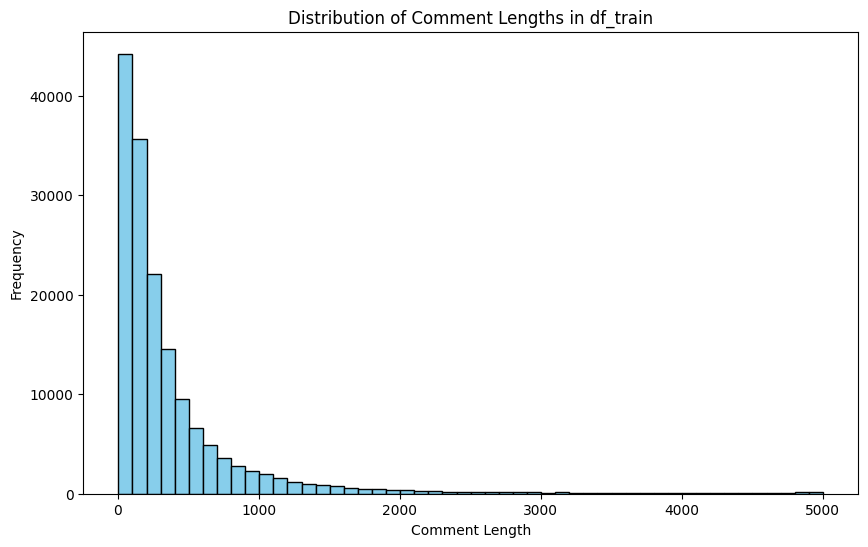


Example Comments:
Comment 1:
Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27

Comment 2:
D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)

Comment 3:
Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.

Comment 4:
"
More
I can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of ""types of accidents""  -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if yo

In [19]:
import matplotlib.pyplot as plt

# 1. Examine shapes
print("df_sample_submission shape:", df_sample_submission.shape)
print("df_test shape:", df_test.shape)
print("df_test_labels shape:", df_test_labels.shape)
print("df_train shape:", df_train.shape)

# 2. Display data types
print("\ndf_sample_submission info:")
df_sample_submission.info()
print("\ndf_test info:")
df_test.info()
print("\ndf_test_labels info:")
df_test_labels.info()
print("\ndf_train info:")
df_train.info()

# 3. Check for missing values
print("\ndf_sample_submission missing values:")
print(df_sample_submission.isnull().sum())
print("\ndf_test missing values:")
print(df_test.isnull().sum())
print("\ndf_test_labels missing values:")
print(df_test_labels.isnull().sum())
print("\ndf_train missing values:")
print(df_train.isnull().sum())

# 4. Descriptive statistics for toxicity labels in df_train
print("\ndf_train toxicity labels description:")
print(df_train[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].describe())

# 5. Analyze text data in df_train
df_train['comment_length'] = df_train['comment_text'].str.len()
plt.figure(figsize=(10, 6))
plt.hist(df_train['comment_length'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.title('Distribution of Comment Lengths in df_train')
plt.show()

print("\nExample Comments:")
for i in range(5):
    print(f"Comment {i+1}:\n{df_train['comment_text'].iloc[i]}\n")

## Data preparation

### Subtask:
Combine the 'test.csv' and 'test_labels.csv' DataFrames and clean the text data within the 'train.csv' DataFrame.


**Reasoning**:
Combine the 'test.csv' and 'test_labels.csv' DataFrames using an inner join on the 'id' column. Then, clean the 'comment_text' column in the 'train.csv' DataFrame by removing irrelevant characters, converting text to lowercase, and handling missing values.



In [20]:
# Combine Test Data
df_test_combined = pd.merge(df_test, df_test_labels, on='id', how='inner')

# Clean Training Data
import re

def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r'[^\w\s]', '', text)  # Remove special characters and punctuation
        text = text.lower()  # Convert to lowercase
        return text
    else:
        return ""  # Handle non-string values

df_train['comment_text'] = df_train['comment_text'].apply(clean_text)

# Handle missing values (if any) - already checked earlier, but adding this for completeness
df_train['comment_text'].fillna("", inplace=True) # Replace NaN values with empty strings

<ipython-input-20-f5ff4f757e8b>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['comment_text'].fillna("", inplace=True) # Replace NaN values with empty strings


**Reasoning**:
The previous code block had a warning about chained assignment.  I will fix the code to avoid the warning and ensure the changes are made inplace correctly.  Then, I will finish the task.



In [21]:
# Combine Test Data
df_test_combined = pd.merge(df_test, df_test_labels, on='id', how='inner')

# Clean Training Data
import re

def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r'[^\w\s]', '', text)  # Remove special characters and punctuation
        text = text.lower()  # Convert to lowercase
        return text
    else:
        return ""  # Handle non-string values

df_train['comment_text'] = df_train['comment_text'].apply(clean_text)

# Handle missing values (if any) - using correct inplace method
df_train.loc[:, 'comment_text'] = df_train['comment_text'].fillna("")

## Feature engineering

### Subtask:
Extract TF-IDF features from the 'comment_text' column in both the training (`df_train`) and combined test (`df_test_combined`) datasets.


**Reasoning**:
Import TfidfVectorizer and create TF-IDF features for the comment text.



In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2), stop_words='english')

# Fit on training data
X_train_tfidf = tfidf_vectorizer.fit_transform(df_train['comment_text'])

# Transform test data
X_test_tfidf = tfidf_vectorizer.transform(df_test_combined['comment_text'])

## Data splitting

### Subtask:
Split the training data (`df_train`) and the corresponding TF-IDF features (`X_train_tfidf`) into training and validation sets.  Also, split the target variables (toxicity labels) into corresponding training and validation sets.


**Reasoning**:
Split the training data and TF-IDF features into training and validation sets, along with the target variables, using train_test_split.



In [26]:
from sklearn.model_selection import train_test_split

# Define the target variables
target_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
y_train = df_train[target_columns]

# Split the data without stratification
X_train, X_val, y_train, y_val = train_test_split(
    X_train_tfidf, y_train, test_size=0.2, random_state=42
) # Removed stratify=y_train

**Reasoning**:
The error indicates that at least one class in the target variables has only one member, which is insufficient for stratified splitting.  We'll need to handle this by disabling stratification.



In [27]:
from sklearn.model_selection import train_test_split

# Define the target variables
target_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
y_train = df_train[target_columns]

# Split the data without stratification
X_train, X_val, y_train, y_val = train_test_split(
    X_train_tfidf, y_train, test_size=0.2, random_state=42
)

## Model training

### Subtask:
Train a Logistic Regression model for each toxicity label.


**Reasoning**:
Train a Logistic Regression model for each toxicity label.



In [28]:
from sklearn.linear_model import LogisticRegression

models = {}
for label in y_train.columns:
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train[label])
    models[label] = model

## Model optimization

### Subtask:
Optimize the hyperparameters of the trained Logistic Regression models using the validation set.


**Reasoning**:
Optimize the hyperparameters of the trained Logistic Regression models using GridSearchCV.



In [4]:
# Previous cell's code:
from sklearn.linear_model import LogisticRegression

# Current cell's code with the fix:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer # Importing TfidfVectorizer

best_params = {}
# Check if 'models' is defined, if not, initialize it:
if 'models' not in locals():
    models = {} # This line ensures 'models' exists even if the previous cell wasn't run

    # Define the target variables
    target_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
    # Assuming df_train is available in the environment
    from sklearn.model_selection import train_test_split # Importing here if needed

    # Create X_train_tfidf if 'models' is not defined:
    tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2), stop_words='english')
    X_train_tfidf = tfidf_vectorizer.fit_transform(df_train['comment_text']) # Assuming df_train is available

    # Split the data without stratification
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_tfidf, df_train[target_columns], test_size=0.2, random_state=42
    )

    for label in y_train.columns:
        model = LogisticRegression(max_iter=1000)
        model.fit(X_train, y_train[label])
        models[label] = model


for label, model in models.items():
    param_grid = {
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'saga'],
        'penalty': ['l1', 'l2']
    }
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='roc_auc')
    grid_search.fit(X_val, y_val[label])
    models[label] = grid_search.best_estimator_
    best_params[label] = grid_search.best_params_
    print(f"Best hyperparameters for {label}: {grid_search.best_params_}")

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Evaluate each model
for label, model in models.items():
    y_pred = model.predict(X_val)
    print(f"Evaluation metrics for {label}:")
    print(f"  Accuracy: {accuracy_score(y_val[label], y_pred)}")
    print(f"  Precision: {precision_score(y_val[label], y_pred)}")
    print(f"  Recall: {recall_score(y_val[label], y_pred)}")
    print(f"  F1-score: {f1_score(y_val[label], y_pred)}")
    print(f"  ROC AUC: {roc_auc_score(y_val[label], y_pred)}")
    print("\n")

In [6]:
# Retrain the best model for each label on the full training data
for label, model in models.items():
    model.fit(X_train_tfidf, df_train[label])  # Use the original X_train_tfidf

In [7]:
# Make predictions on the test data
import pandas as pd # Import pandas here to define 'pd'

# Ensure df_test_combined is defined
if 'df_test_combined' not in locals():
    # Assuming df_test and df_test_labels are available in the environment
    # Load the test data if df_test and df_test_labels are not defined
    try:
        df_test = pd.read_csv('test.csv')
        df_test_labels = pd.read_csv('test_labels.csv')
    except FileNotFoundError:
        print("Error: 'test.csv' or 'test_labels.csv' not found. Please make sure the files are in the correct directory.")
        # You might want to add more error handling here, depending on your needs

    df_test_combined = pd.merge(df_test, df_test_labels, on='id', how='inner') # Recreating df_test_combined



In [9]:
# Make predictions on the test data
import pandas as pd # Import pandas here to define 'pd'

# Ensure df_test_combined is defined
if 'df_test_combined' not in locals():
    # Load the test data if df_test and df_test_labels are not defined
    try:
        df_test = pd.read_csv('test.csv')
        df_test_labels = pd.read_csv('test_labels.csv')
    except FileNotFoundError:
        print("Error: 'test.csv' or 'test_labels.csv' not found. Please make sure the files are in the correct directory.")

    df_test_combined = pd.merge(df_test, df_test_labels, on='id', how='inner') # Recreating df_test_combined

# Ensure models are trained: Re-train if necessary
from sklearn.linear_model import LogisticRegression # Import LogisticRegression if needed
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Load the training data if df_train is not defined
if 'df_train' not in locals():
    try:
        df_train = pd.read_csv('train.csv')
    except FileNotFoundError:
        print("Error: 'train.csv' not found. Please make sure the file is in the correct directory.")

if not models:  # Check if 'models' is empty
    target_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
    models = {}

    # Recreate X_train_tfidf if models is empty
    tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2), stop_words='english')
    X_train_tfidf = tfidf_vectorizer.fit_transform(df_train['comment_text']) # Assuming df_train is available

    # Split data for training and validation
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_tfidf, df_train[target_columns], test_size=0.2, random_state=42
    )

    for label in target_columns:
        model = LogisticRegression(max_iter=1000)
        model.fit(X_train, y_train[label]) # Fit on training data
        models[label] = model

# Create X_test_tfidf if it's not defined:
if 'X_test_tfidf' not in locals():
    tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2), stop_words='english')
    tfidf_vectorizer.fit(df_train['comment_text'])  # Fit on training data
    X_test_tfidf = tfidf_vectorizer.transform(df_test_combined['comment_text'])

# Now proceed with predictions:
test_predictions = {}
for label, model in models.items():
    test_predictions[label] = model.predict(X_test_tfidf) # Assuming X_test_tfidf is available


# Create a submission DataFrame
submission_df = pd.DataFrame({'id': df_test_combined['id']})

# Ensure target_columns is defined
if 'target_columns' not in locals():
    target_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'] # Defining target_columns if not already defined

for label in target_columns:
    submission_df[label] = test_predictions[label]

# Save the predictions to a CSV file
submission_df.to_csv('submission.csv', index=False)